# Import Data and Packages

## Packages

In [ ]:
!pip install cpi

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.graph_objects as go
import cpi
cpi.update()

## Data

### Revenues

In [167]:
rev = pd.read_csv('../Assets/Revenues - Sheet1.csv')

# Remove newline char from columns
rev.columns = [col.replace("\n", "") for col in rev.columns]

# Set index to years
rev = rev.set_index('Year')

rev.head()

,Individual Income Taxes,Payroll Taxes,Corporate Income Taxes,Excise Taxes,Estate and Gift Taxes,Customs Duties,Miscellaneous Receipts,Total
Year,,,,,,,,
1962,45.6,17.0,20.5,12.5,2.0,1.1,0.8,99.7
1963,47.6,19.8,21.6,13.2,2.2,1.2,1.0,106.6
1964,48.7,22.0,23.5,13.7,2.4,1.3,1.1,112.6
1965,48.8,22.2,25.5,14.6,2.7,1.4,1.6,116.8
1966,55.4,25.5,30.1,13.1,3.1,1.8,1.9,130.8


# Make Adjustments

## Adjust for Inflation

In [168]:
rev = rev.T

In [169]:
for i in range(1962, 2019):
    rev[i] = rev[i].apply(lambda x: cpi.inflate(x, i))

In [170]:
rev = rev.T

In [171]:
rev.head()

,Individual Income Taxes,Payroll Taxes,Corporate Income Taxes,Excise Taxes,Estate and Gift Taxes,Customs Duties,Miscellaneous Receipts,Total
Year,,,,,,,,
1962,379.154940,141.351623,170.453427,103.935017,16.629603,9.146281,6.651841,828.985692
1963,390.610889,162.481000,177.252000,108.320667,18.053444,9.847333,8.206111,874.771444
1964,394.480997,178.204968,190.355306,110.973094,19.440542,10.530294,8.910248,912.085426
1965,389.016559,176.970648,203.277095,116.386102,21.523457,11.160311,12.754641,931.088813
1966,429.361969,197.630509,233.281503,101.527830,24.025670,13.950389,14.725410,1013.728259


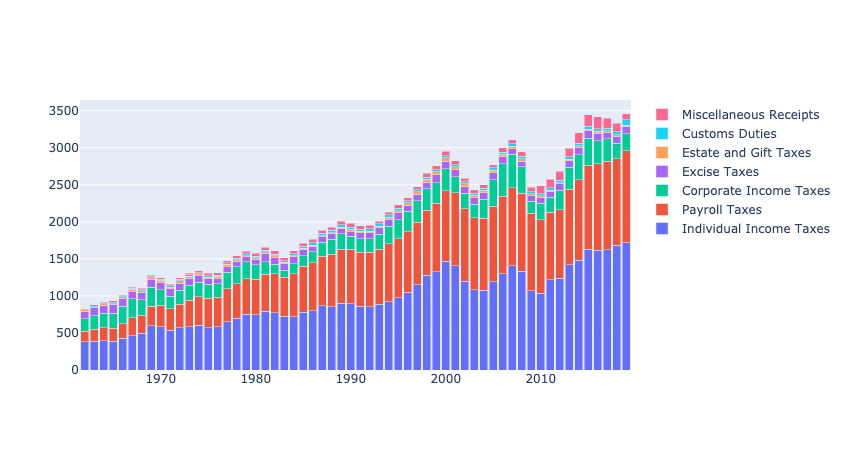

In [172]:
data_cols = rev.drop(columns = ['Total']).columns.to_list()

years = rev.index.to_list()

fig = go.Figure(data = [go.Bar(name = col, x = years, y = rev[col]) for col in data_cols])

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

## Adjust for Population

In [173]:
pop = pd.read_csv('../Assets/US Population - Sheet1.csv')
pop = pop.set_index('Year')
pop.tail()

,Population
Year,
2015,320635163
2016,322941311
2017,324985539
2018,326687501
2019,328687501


In [174]:
rev = rev.T

In [175]:
for i in range(1962, 2020):
    rev[i] = rev[i].apply(lambda x: x / (pop.loc[i, 'Population'] / 1000000000))

In [176]:
rev = rev.T

In [177]:
rev.tail()

,Individual Income Taxes,Payroll Taxes,Corporate Income Taxes,Excise Taxes,Estate and Gift Taxes,Customs Duties,Miscellaneous Receipts,Total
Year,,,,,,,,
2015,5091.133019,3519.979235,1135.988793,324.804242,63.440910,115.647492,487.371573,10738.365263
2016,5008.975267,3612.643632,970.628672,307.776114,69.330619,112.743250,505.400777,10587.498333
2017,5002.882774,3662.560327,936.208294,264.155741,71.870536,109.066690,406.635926,10453.380288
2018,5153.242762,3583.546957,626.592690,290.797780,70.403673,126.420509,341.916969,10192.921339
2019,5226.544955,3782.011778,700.361283,300.893705,50.808138,215.402167,257.387335,10533.409361


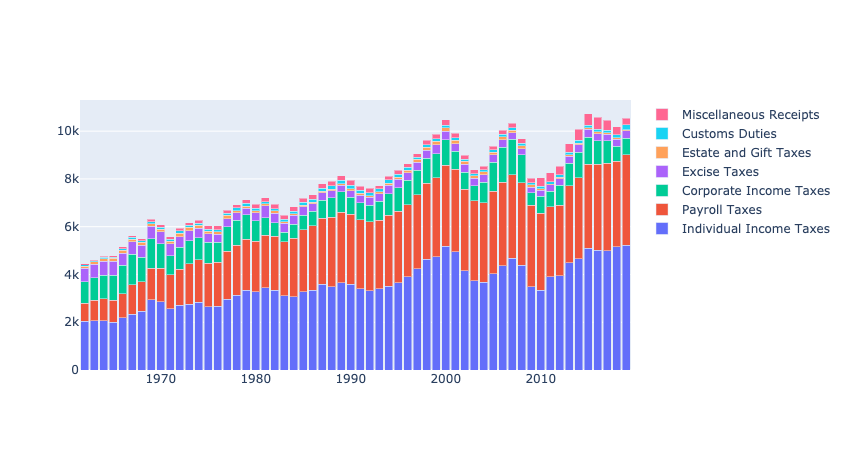

In [178]:
data_cols = rev.drop(columns = ['Total']).columns.to_list()

years = rev.index.to_list()

fig = go.Figure(data = [go.Bar(name = col, x = years, y = rev[col]) for col in data_cols])

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

## Normalize 

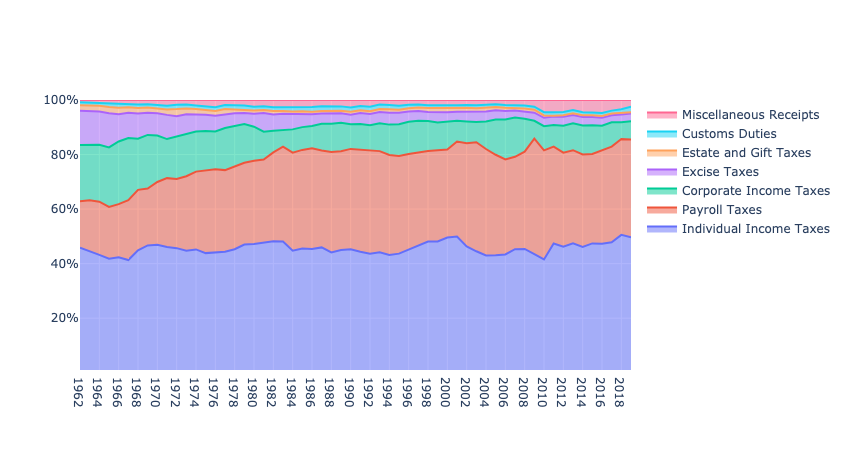

In [189]:
import plotly.graph_objects as go

years = rev.index.to_list()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = years, y = rev['Individual Income Taxes'],
    mode='lines',
    #line=dict(width=0.5, color='rgb(184, 247, 212)'),
    stackgroup='one',
    groupnorm='percent', # sets the normalization for the sum of the stackgroup
    name = 'Individual Income Taxes'
))

for col in rev.columns.to_list()[1:]
    fig.add_trace(go.Scatter(
        x = years, y = rev[col],
        mode='lines',
        stackgroup='one',
        name = col
    ))  

fig.update_layout(
    showlegend=True,
    xaxis_type='category',
    yaxis=dict(
        type='linear',
        range=[1, 100],
        ticksuffix='%'))

fig.show()